### Homework 1 - Graded Assignment (Individual Assignment)

Data = cars.csv
Predictors = [Cylinders, Weight, Horsepower]
Target = MPG

You will remove all the observations for which MPG and Horsepower is zero.
Do a scaling - do standardization of all the predictors ((X-mean)/sd) [This won't make it standard normal distributed) - This is done beacuse different variables are measured in different scales.

Keep aside one random observation from the dataset as test. (DO NOT include that observation for training the algorithm)

you need to build a kNN algorithm for regression.

kNN(trainX, trainY, testX, k)

If **X** follows a normal distribution with *mean=mu* and *variance=sigma*, then

**Z=(X - mu)/sigma** will also follow a normal distribution with *mean=0* and *variance=1*

A normal distribution with zero mean and variance 1 is called a standard normal distribution.

In [1]:
import numpy as np
import pandas as pd

In [2]:
index = 0

In [3]:
cars = pd.read_csv("cars.csv")

In [4]:
cars2 = cars[["MPG","Cylinders","Weight","Horsepower"]]

In [5]:
cars2

,MPG,Cylinders,Weight,Horsepower
0,18.0,8,3504,130
1,15.0,8,3693,165
2,18.0,8,3436,150
3,16.0,8,3433,150
4,17.0,8,3449,140
...,...,...,...,...
401,27.0,4,2790,86
402,44.0,4,2130,52
403,32.0,4,2295,84
404,28.0,4,2625,79


In [6]:
#dropping zero values 

In [7]:
cars2=cars2[cars2['Horsepower']>0]

In [8]:
cars2=cars2[cars2['MPG']>0]

In [9]:
cars2.head()

,MPG,Cylinders,Weight,Horsepower
0,18.0,8,3504,130
1,15.0,8,3693,165
2,18.0,8,3436,150
3,16.0,8,3433,150
4,17.0,8,3449,140


In [10]:
trainX = cars2.iloc[1:406, [1,2,3]]

In [11]:
trainX

,Cylinders,Weight,Horsepower
1,8,3693,165
2,8,3436,150
3,8,3433,150
4,8,3449,140
5,8,4341,198
...,...,...,...
401,4,2790,86
402,4,2130,52
403,4,2295,84
404,4,2625,79


In [12]:
len(trainX)

391

In [13]:
test = cars2.iloc[0,[1,2,3]]
test

Cylinders        8.0
Weight        3504.0
Horsepower     130.0
Name: 0, dtype: float64

In [14]:
trainY = cars2.MPG[1:406]

# without standardization


In [15]:
len(trainX)

391

In [16]:
len(trainY)

391

In [17]:
#fucntion to calculate euclidean distance between two points
def euclidean(p,q):
    d = 0

    for i in range(len(p)):
        d = d + (p[i]-q[i])**2

    return(np.sqrt(d))


In [18]:
def knn_cars(X_train,test,y, k=1):
    dist = []
    
    for i in range(len(X_train)):
        dist.append(euclidean(test, X_train.iloc[i]))

    d = dist.copy()
    dist.sort()
    #print(d)
    #print(len(d))

    index = []
    for i in range(0,k):
        ind = d.index(dist[i])
        index.append(ind)
        d[ind] = -1
        #print(d)
        
    #print(index)
    pred_y = np.mean(y.iloc[index])
    return(pred_y)

In [19]:
knn_cars(trainX,test,trainY,k=2)

18.0

In [20]:
preds=[]
#taking predicted values of k froom 1 to 25 
for k in range(1,26):
    preds.append(knn_cars(trainX,test,trainY,k))


In [21]:
errors=(np.array(preds)-18)**2
#contains erros for different values of k

In [22]:
k_error=pd.DataFrame({'k':range(1,26),'SE':errors})

In [23]:
k_error

,k,SE
0,1,0.250000
1,2,0.000000
2,3,0.160000
3,4,0.090000
4,5,0.001600
5,6,1.604444
6,7,1.057959
7,8,1.380625
8,9,1.022346
9,10,0.504100


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

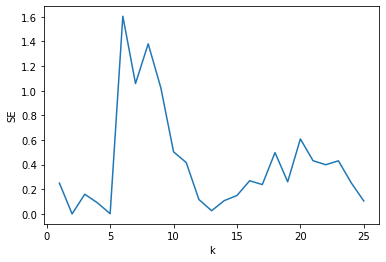

In [25]:
#plotting errors for different k values to find the optimum value for k
sns.lineplot(x=k_error.k,y=k_error.SE)
#lowest optimum value is k=5

# with standardization

In [26]:
test['Cylinders']=(test['Cylinders']-trainX['Cylinders'].mean())/trainX['Cylinders'].std()
test['Weight']=(test['Weight']-trainX['Weight'].mean())/trainX['Weight'].std()
test['Horsepower']=(test['Horsepower']-trainX['Horsepower'].mean())/trainX['Horsepower'].std()


trainX['Cylinders']=(trainX['Cylinders']-trainX['Cylinders'].mean())/trainX['Cylinders'].std()
trainX['Weight']=(trainX['Weight']-trainX['Weight'].mean())/trainX['Weight'].std()
trainX['Horsepower']=(trainX['Horsepower']-trainX['Horsepower'].mean())/trainX['Horsepower'].std()

In [27]:
test

Cylinders     1.488139
Weight        0.620844
Horsepower    0.664505
Name: 0, dtype: float64

In [28]:
trainX

,Cylinders,Weight,Horsepower
1,1.488139,0.843178,1.573154
2,1.488139,0.540851,1.183733
3,1.488139,0.537322,1.183733
4,1.488139,0.556144,0.924119
5,1.488139,1.605467,2.429880
...,...,...,...
401,-0.860447,-0.219085,-0.477796
402,-0.860447,-0.995490,-1.360483
403,-0.860447,-0.801388,-0.529719
404,-0.860447,-0.413186,-0.659526


In [29]:
knn_cars(trainX,test,trainY,k=13)

17.915384615384614

In [30]:
preds=[]
for k in range(1,26):
    preds.append(knn_cars(trainX,test,trainY,k))

In [31]:
errors=(np.array(preds)-18)**2

In [32]:
k_error=pd.DataFrame({'k':range(1,26),'SE':errors})

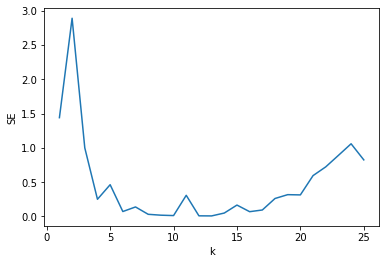

In [33]:
sns.lineplot(x=k_error.k,y=k_error.SE)
#lowest optimum value is k=13

we have tried to find the optimal value of k using only one test observation here. the algorithm gives best result on the test data when k=2 when the data is not standardised. we get the best results for standardized when k=13.